<center>
    
## <font color='maroon'>ASTR 20500</font>
## <font color='maroon'>homework assignment 4</font>
    
### <font color='maroon'>Output formatting, distribution of a sum or difference of random Gaussian numbers
### <font color='maroon'>Distribution of a sum of squares of random Gaussian numbers
### <font color='maroon'>Using string formatting and dictionaries to organize access to and analyses of images
    
    
#### <font color='black'>distributed: Monday, October 23</font>
#### <font color='black'>due: Thursday, October 28 (11pm)</font>
    
    
#### 20 points total (+10 potential extra-credit points)
</center>
    

There are 4 exercises in this notebook, but the required minimum is 3. You can choose either exercise 2 or 3 as your default. If you do both, you will get 8 extra-credit points. 

Try to write code following PEP 8 style guidelines. 

Information you need to carry out exercises in this assignment is available in the notebooks [05_prngs](https://drive.google.com/file/d/1rBHcnst3KMF_gPj5ZA1KVfdKh_eE2sNO/view?usp=sharing) and [06_pdf_gaussian_clt](https://drive.google.com/file/d/1v3xgr1Ra--YGtw0vfvORE6cobdbF-vju/view?usp=sharing). 

Background Python information useful for this assignment is provided in the [hw04_background_info](https://drive.google.com/file/d/1CXGu0VLQkylfLeXNdZqRWMMqWHrw-yt5/view?usp=sharing) notebook. 

If you work in a group, you can discuss ideas and results but note that the actual calculations that you will present in your homework should be your own and group work does not mean that code should be shared. Code that you will be submitted should be written by you independently. 
  

### <font color='blue'>Exercise 1 (6 points): Implementing temperature conversion function</font>

**_What you are learning in this exercise_**: how to convert temperatures between different units (if you did not already know this), using keyword parameters of functions and how to format output nicely. 

**1a. (3 points)** Implement a function converting degrees in Fahrenheit to degrees Kelvin and vice versa, using this conversion equation 

conversion from degrees Fahrenheit to Celcius: 

$$K = (F - 32)\times {5\over 9} + 273.15$$


The code in your function should take into account that temperature in degrees Kelvin cannot be smaller than zero. In other words, your code should return 0 Kelvin as the smallest even if equation above gives the number $<0$). 



In [ ]:
def tconvert (temp, unit='F', convert_to='K'): 
    '''
    Function converting input temperature in a given unit (Fahrenheit or Kelvin)
    to degrees in different units specified by convto argument 
    
    Parameters:
    -----------
        temp:   float, input temperature
        unit:   str = F', 'K' - unit of the input temperature
        convert_to: str = 'F', 'K' - unit of the output temperature
        
    Returns:
    --------
        conv_temp: float, output temperature in convto units
    '''
    if unit == 'F':
      ktemp = (temp-32)*(5/9)+273.15
      if ktemp < 0:
        return 0
      else:
        return ktemp
    elif unit == 'K':
      ftemp = (temp-273)*(9/5)+32
      if ftemp < 0:
        return 0
      else:
        return ftemp 
    else:
      return "Invalid Input!"

**1b (3 points)** Test your function for a few of input F values and print the results showing the input and output temperatures in a formatted way using [string formatting](https://www.digitalocean.com/community/tutorials/how-to-use-string-formatters-in-python-3) that you read about. 

Compute and print out the temperature of the Sun's surface ($T\approx 6600$ K) in Fahrenheit. 

The output of your print statement should be formatted similarly to the output shown below. Namely, numbers should have only two digits after point and units in successive prints should be indented properly so that the numbers and units of successive prints line up with each other like this: 

     -90.00 F    205.37 K
     -95.00 F    202.59 K
    -100.00 F    199.82 K


In [ ]:
temps=[-500,-250,-95,0,65,150,500,6600]

# To allow the user to add some more temperatures to the list to convert if they would like.
user_input = input("Input some temperatures in degrees Fahrenheit that you would like to convert to Kelvin, separated by a space: ").split()

for i in range(len(user_input)):
  temps.append(float(user_input[i]))

for i in range(len(temps)):
  print("{7:.2f} F {:10.2f} K".format(temps[i],tconvert(temps[i])))

In [ ]:
import antigravity

### <font color='blue'>Exercise 2 (8 points): A Monte Carlo experiment: distribution of a sum or difference of Gaussian random numbers</font>

**Background information**. When we operate with random variables, results of such operations are also random numbers, but these may either have the same or different probability distribution (most often different). In this exercise, you will examine the special cases of random variables obtained by adding or subtracting two random numbers drawn from the *same* Gaussian distribution with a given mean $\mu$ and variance $\sigma^2$.  These cases are of significant practical importance and from results of these experiments you should see both the form of the distribution of these resulting random numbers and how the variance of their distribution is related to the original variance $\sigma^2$ of the Gaussian distribution from which the original numbers are drawn. 

For the context, you should review results on the linearity of variance of independent random numbers in the [04_expectation_variance_std](https://drive.google.com/file/d/1MgbxmGCYyk7TsQe0ATO1ZSzbMIWGt7-m/view?usp=sharing) notebook. Also, see information on how Gaussian-distributed pseudo-random numbers are generated in [hw04_background_info](https://drive.google.com/file/d/1CXGu0VLQkylfLeXNdZqRWMMqWHrw-yt5/view?usp=sharing) notebook. 


**_What you are learning in this exercise_**: the distribution of a sum or difference of two random numbers drawn from a Gaussian distribution. 

Take 2 Gaussian distributions, adding them, showing that you get a Gaussian distribution. 

part b, subtract the same two, you get a different gaussian with the same variance as the sum.

**Task 2a (3 points).** Using the function <tt>gauss_prng below</tt> that produces Gaussian numbers using the Box-Mueller method described in [hw04_background_info](https://drive.google.com/file/d/1CXGu0VLQkylfLeXNdZqRWMMqWHrw-yt5/view?usp=sharing) notebook construct new random variables equal to the sum or difference of two Gaussian random numbers $x+y$ or $x-y$ and examine their distributions using histograms. 

**Task 2b (5 points).** From examining histogram of $x$ or $y$ and $x+y$ or $x-y$ what can you say about how $\sigma_{x+y}$ or $\sigma_{x-y}$ distribution relates to $\sigma_x$ and $\sigma_y$? Present an argument and back it up with a plot comparing Gaussian pdf as a line to the histogram of $x+y$ and $x-y$. 

**extra-credit (1 point)**. You can use <tt>plt.title(string)</tt> to include a title for your plot, where string is a string that will be displayed as the title. You can use string formatting for this string to display title for a given $x+y$ or $x-y$ case automatically. 

It is also possible to plot all histograms in the same plot by adjusting <tt>alpha</tt> parameter to values <1, which increases transparency of the plotted objects (see [here](https://www.kite.com/python/answers/how-to-plot-two-histograms-on-one-plot-using-matplotlib-in-python) for example).  In this case you can use <tt>label=string</tt> for each histogram and then display them using <tt>plt.legend(loc='best')</tt> at the end. 

**_Hint_**: you can use functions <tt>gaussian_pdf</tt> and <tt>gauss_line</tt> from [hw04_background_info](https://drive.google.com/file/d/1CXGu0VLQkylfLeXNdZqRWMMqWHrw-yt5/view?usp=sharing) notebook and example of how to overplot the line over histogram shown there in this part of the exercise. 


In [ ]:
from random import random 
from math import sin, cos, log, pi

def gauss_prng(mu=0, sigma=1., halfsize=1): 
    '''
    generate 2*halfsize Gaussian distributed random numbers using Box-Mueller method
    
    mu is the mean and sigma is the standard deviation of the Gaussian 
    
    Returns: 
    a list of halfsize*2 floats - random numbers drawn from a Gaussian pdf with mean mu and stdev sigma
    '''
    xg = []
    for i in range(halfsize): 
        u1 = random()
        u2 = random()
        # transform uniformly distributed numbers in u1 and u2 into Gaussian pdf samples
        # using Box-Mueller transformation
        g1 = mu + sigma*(-2.*log(u1))**0.5 * cos(2.*pi*u2)
        # g2 will stay with mu=0 and sigma=1
        g2 = mu + sigma*(-2.*log(u1))**0.5 * sin(2.*pi*u2)     
        xg.append(g1)
        xg.append(g2)
        
    return xg

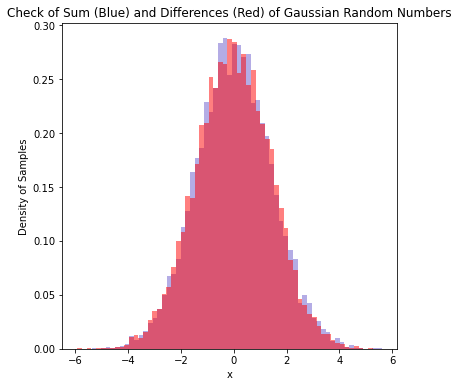

In [ ]:
import matplotlib.pyplot as plt

# generate two vectors of nr pseudo-random numbers uniformly distributed in [0,1] (default)
nr = 5000
mu, sigma = 0., 1. # mean, st.

# this produces a list xg with nr*2 Gaussian random numbers 
xg1 = gauss_prng(mu=0, sigma=1., halfsize=nr)
xg2 = gauss_prng(mu=0, sigma=1., halfsize=nr)

xg_sum = []
xg_diff = []
for i in range(len(xg1)):
  xg_sum.append(xg1[i]+xg2[i])
  xg_diff.append(xg1[i]-xg2[i])

plt.figure(figsize=(6,6)) # define figure and its size
plt.xlabel('x') # x-axis label
plt.ylabel('Density of Samples') # y-axis label
plt.hist(xg_sum, density=True, color='slateblue', alpha=0.5, bins='auto') # produce histogram of xg_sum values 
plt.title('Check of Sum (Blue) and Differences (Red) of Gaussian Random Numbers')
plt.hist(xg_diff, density=True, color='red', alpha=0.5, bins='auto') # produce histogram of xg_diff values 
plt.show() # show the entire plot

I don't have time to finish this question -- I am currently at a Model United Nations Conference in Washington D.C. and don't really have the energy. I did question 3, so hopefully 2a (if I did it right) will serve as extra-credit even though I didn't do 2b?

### <font color='blue'>Exercise 3 (8 points): A Monte Carlo experiment: distribution of a sum of squares of Gaussian random numbers</font>

**Background information**. When random numbers drawn from the Gaussian pdf are modified non-linearly (i.e. not by a simple multiplication by a constant or a constant shift), the distribution of the modified numbers will no longer be Gaussian. 

At the same time, we know that according to the Central Limit Theorem if sum enough of these modified numbers, the distribution of the sum will be close to the Gaussian and will become closer and closer as we some more and more of these numbers (see notebook [06_pdf_gaussian_clt](https://drive.google.com/file/d/1v3xgr1Ra--YGtw0vfvORE6cobdbF-vju/view?usp=sharing). 

Distribution that results from summing squares of Gaussian random numbers is of particular importance in statistics amd is called the $\chi^2_k$ pdf, where $k$ is the number of squares used in the sum. In this exercise, you will examine this distribution using Monte Carlo experiment with Gaussian distributed random numbers.  


**_What you are learning in this exercise_**: how the important $\chi^2$ pdf arises. 

**Task 3a (4 points).** Using the <tt>gauss_prng</tt> function provided above in ex 2 with <tt>mu=0</tt> and <tt>sigma=1.</tt> implement a function to generate <tt>ns</tt> sums of $k$ squares of Gaussian random numbers defined as shown below: 


In [139]:
def get_sums_of_gauss_squares(ns, k):
    '''
    Produce ns sums of k squares of random drawn from Gaussian of mu=0, sigma=1 and return them in a list
    
    Parameters:
    -----------
        ns, k - int, the number of sums to produce, k is the number of squares of Gaussian numbers in each sum
        
    Returns:
    --------
        xs - list of floats containing ns sums
    '''
    xs = []

    for i in range(0,ns):
        sum=0
        for j in gauss_prng(halfsize = int(k/2)):
          j **= 2
          sum += j
        xs.append(sum)

    return xs

**Task 3b (4 points).** Plot histograms of values (with <tt>density=True</tt>) in the list the function implemented in 3a returns for a suitably large <tt>ns</tt> (10000 or larger), for <tt>k=2, 4, 6, 10, 20</tt> (2 points). Describe the shape of the distribution and the trend you observe in the changes of its shape as <tt>k</tt> increases (2 points).

**extra-credit (1 point)**. You can use <tt>plt.title(string)</tt> to include a title for your plot, where string is a string that will be displayed as the title. You can use string formatting for this string to display title for a given $k$ value automatically. 

It is also possible to plot all histograms in the same plot by adjusting <tt>alpha</tt> parameter to values <1, which increases transparency of the plotted objects (see [here](https://www.kite.com/python/answers/how-to-plot-two-histograms-on-one-plot-using-matplotlib-in-python) for example).  In this case you can use <tt>label=string</tt> for each histogram and then display them using <tt>plt.legend(loc='best')</tt> at the end. 

**_Note_**: if you cannot make the function in 3a correctly for some reason, you can still do 3b using [this function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) from SciPy module. 

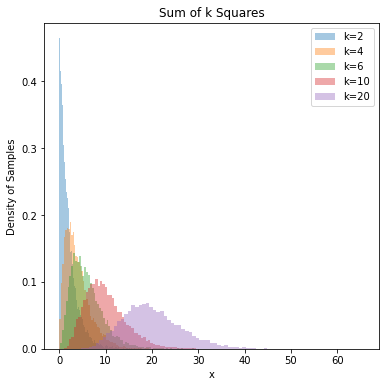

In [138]:
plt.figure(figsize=(6,6)) # define figure and its size
plt.xlabel('x') # x-axis label
plt.ylabel('Density of Samples') # y-axis label

ns=10000

for k, title in zip([2, 4, 6, 10, 20],['k=2', 'k=4', 'k=6', 'k=10', 'k=20']):
  plt.hist(get_sums_of_gauss_squares(ns, k), density=True, alpha=0.4, bins='auto', label=title)
plt.legend(loc='best')
plt.title('Sum of k Squares')
plt.show()

### <font color='blue'>Exercise 4 (6 points): Constructing URL for accessing SDSS image files and organizing images into a dictionary. 
    
**Background info.** Sloan Digital Sky Survey (SDSS) imaged a quarter of the sky in five "filters" called $u$, $g$, $r$, $i$, and $z$ that are sensitive to [different wavelength ranges](https://www.sdss.org/instruments/camera/) of light. You can read background information about the survey in [hw04_background_info]() notebook. Images obtained by SDSS are public and are arranged by tiles and frames in the following URL: 
    
    https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/
    
The URL to individual frames looks like this
    
    https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/4263/6/frame-r-004263-6-0254.fits.bz2
    
where 4263 is the field number, 6 is the camera column (CAMCOL) number, r is the name of the filter - a single lower-case character: u, g, r, i or z, 004263 - a 6-character string containing leading 0's and then the field number, camcol number CAMCOL (1-digit number 1 to 6), image (frame) number 0254 consisting of 4 characters with leading 0s and number that can contain 2 to 4 digits.  
    
**Task 4a (3 points).** Implement a function with the format below that will return a URL string for a given fixed field=4263, given input containing the string of CAMCOL number ('1', '2', '3', '4', '5', or '6'), filter name ('u', 'g', 'r', 'i' or 'z') and frame number (4 characters). 
    
Your function should use string format method to produce the URL and **_cannot use_** + operations to concatenate pieces of a string. 

In [ ]:
def get_sdss_frame_url(field, camcol, f, frame_number): 
    '''
    Constructs SDSS frame URL to access Data Release 12 (DR12) frames at
    https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301
    
    Parameters: 
        field - str, 4 characters containing field number 
        camcol - str ('1', '2', '3', '4', '5', or '6') - camcol number
        f     - str ('u', 'g', 'r', 'i' or 'z') - SDSS filter 
        frame_number - str - frame number (4 characters with leading 0s and integer, e.g. '0254')
    Returns: 
        string containing URL, for example: 
            'https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/4263/6/frame-r-004263-6-0254.fits.bz2'
    '''

    ssds_frame_url = "https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/{0}/{1}/frame-{2}-00{0}-{1}-{3}.fits.bz2".format(field, camcol, f, frame_number)
    return ssds_frame_url

user_input = input("Enter the field number, camcol number, filter name, and frame number, seperated by a space: ").split()

print(get_sdss_frame_url(user_input[0],user_input[1],user_input[2],user_input[3]))

Enter the field number, camcol number, filter name, and frame number, seperated by a space: 4 3 3 2
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/4/3/frame-3-004-3-2.fits.bz2


Test your function by substituting its output to assign variable <tt>url</tt> below for say 

      field, f, frame_number = '6', 'r', '253'


**_Note_**: if you don't have [Astropy](https://www.astropy.org/) package installed, please follow instructions at its website to install it as we will be using it frequently from now on. 

In [ ]:
from astropy.io import fits

url = 'https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/4263/6/frame-r-004263-6-0254.fits.bz2'
fimg = fits.open(url) 
image = fimg[0].data.tolist() # save image itself as a 2D list

# Number of rows and columns (dimensions)
nrow, ncol = len(image), len(image[0])
print('loaded FITS image of {:d} x {:d} pixels'.format(nrow,ncol))

loaded FITS image of 1489 x 2048 pixels


**Task 4b. (3 points)** Suppose we want to load and analyze a certain number of SDSS frames in CAMCOL 4263, which we will want to access by their field name, filter name, and frame number, stored as strings in variables <tt>field</tt>, <tt>camcol</tt>, <tt>f</tt>, <tt>frame_number</tt> that are stored as elements in the lists, as shown below.  

In [ ]:
fields = ['4263', '4264', '4288', '4294']
camcols = ['1', '2', '3', '4', '5', '6']
filters = ['u', 'g', 'r', 'i', 'z']

# generate list of strings containing 4-character strings with frame numbers
frame_numbers = list(range(11,469))
for i, d in enumerate(frame_numbers):
    if d < 100:
        frame_numbers[i] = '00' + str(d)
    else:
        frame_numbers[i] = '0' + str(d)

image_urls = {}

for i in range(len(fields)):
  for j in range(len(camcols)):
    for k in range(len(filters)):
      for m in range(len(frame_numbers)):
        image_urls[fields[i]+camcols[j]+filters[k]+frame_numbers[m]] = get_sdss_frame_url(fields[i],camcols[j],filters[k],frame_numbers[m])

user_input = input("Pick element numbers from the list of fields, camcols, filters, and frame_numbers, separated by a space: ").split()

for n in range(len(user_input)):
  user_input[n] = int(user_input[n])

print(image_urls[fields[user_input[0]]+camcols[user_input[1]]+filters[user_input[2]]+frame_numbers[user_input[3]]])

Pick element numbers from the list of fields, camcols, filters, and frame_numbers, separated by a space: 1 2 3 4
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/4264/3/frame-i-004264-3-0015.fits.bz2


Implement a code to store URLs for the frames in these lists in a dictionary image_urls, so that elements in the dictionary (URL for a particular frame) can be accessed like

        image_urls[fields[1]+camcols[2]+filters[3]+frame_numbers[10]]